A.S. Lundervold, version 14.01.23

# Introduction

At this stage of the course, we've only been exposed to the very basics of training CNN models using fastai. Specifically, we've seen code to train a "is it a bird?" and a bear classifier.

> <span style="color:green"> We'll basically use only the methods and techniques shown in Lesson 1 and [Chapter 1 of the book](https://github.com/fastai/fastbook/blob/master/01_intro.ipynb). Later in the course, you'll learn _much_ more about the topic and will have way more control over defining the data, the model construction, and the model training process.</span>

> Before running this notebook, make sure that you've downloaded and extracted the data by going through the notebook `1.0-asl-collect_and_explore_data`. 

# Setup

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
try:
    import colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [2]:
if (colab or kaggle):
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book()
    from fastbook import *

In [3]:
%matplotlib inline
from fastai.vision.all import *

In [4]:
if colab:
    from google.colab import drive
    drive.mount("/content/gdrive")
    DATA = Path('/content/gdrive/MyDrive/DAT255/fruits-360')
    DATA.mkdir(exist_ok=True, parents=True)
    
elif kaggle:
    # The data is already available on Kaggle and can be added 
    # to the notebook using "+ Add Data".
    DATA = Path('/kaggle/input/fruits')

else:
    # Local installation
    # Set this to where you want to download the image data
    NB_DIR = Path.cwd()       # Set NB_DIR to be the current working directory
    #DATA = NB_DIR/'data'      # The data dir is the subdirectory 'data' under NB_DIR
    DATA = Path("/home/ubuntu/data-tmp/fruits-360")

    DATA.mkdir(exist_ok=True) # Create the data directory

In [5]:
NB_DIR = Path.cwd()
MODELS = NB_DIR/'..'/'models'
MODELS.mkdir(exist_ok=True)

# Create a data loader

In [6]:
path = DATA/'fruits-360_dataset'/'fruits-360'

In [7]:
path.ls()

(#6) [Path('/home/ubuntu/data-tmp/fruits-360/fruits-360_dataset/fruits-360/LICENSE'),Path('/home/ubuntu/data-tmp/fruits-360/fruits-360_dataset/fruits-360/Training'),Path('/home/ubuntu/data-tmp/fruits-360/fruits-360_dataset/fruits-360/Test'),Path('/home/ubuntu/data-tmp/fruits-360/fruits-360_dataset/fruits-360/readme.md'),Path('/home/ubuntu/data-tmp/fruits-360/fruits-360_dataset/fruits-360/papers'),Path('/home/ubuntu/data-tmp/fruits-360/fruits-360_dataset/fruits-360/test-multiple_fruits')]

In [8]:
dls = ImageDataLoaders.from_folder(path, train='Training', valid='Test', 
                                   item_tfms=Resize(100, method='squish'))

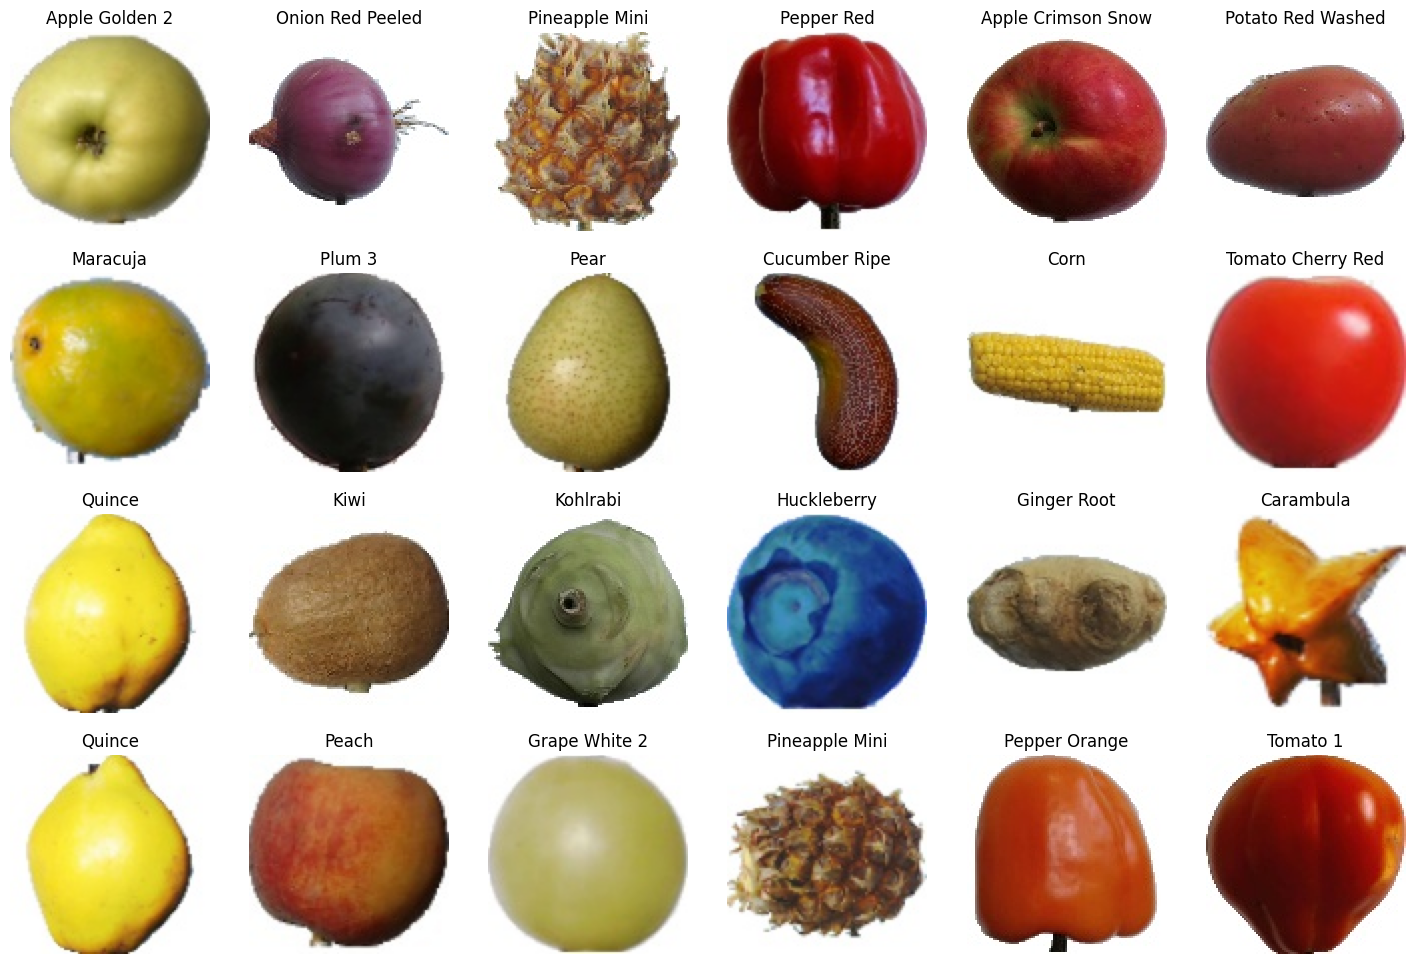

In [9]:
dls.show_batch(max_n=24)

# Train a model

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

/home/ubuntu/anaconda3/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/anaconda3/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.055708,0.121042,0.031030,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.014758,0.058249,0.016969,00:33
1,0.001484,0.031125,0.007273,00:35
2,0.000163,0.027613,0.005377,00:36


# Evaluating the model

> <span style="color:green"> Strictly speaking, this section will draw on _some_ (but not many!) methods covered slightly later in the course. However, these are things that will be familiar to you from previous experience with evaluation of machine learning classifiers. </span>

We want to do a quick check of our model's performance beyond the error rate printed out during the above training process. 

Here are some random images, labels, and predictions: 

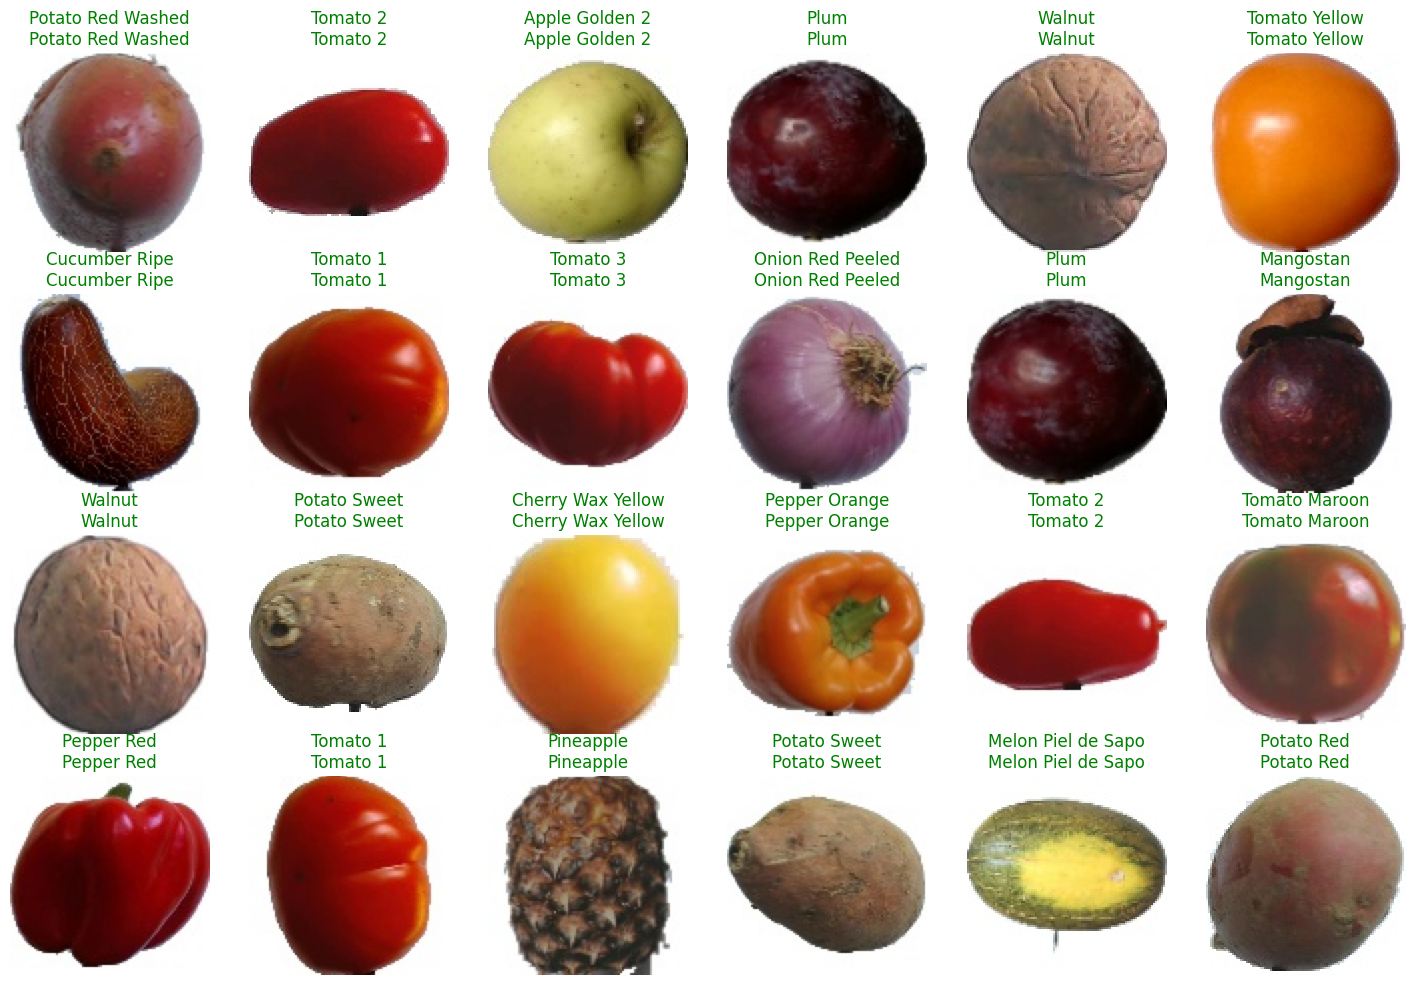

In [12]:
learn.show_results(max_n=24)

How many of the test images did we misclassify? What kinds of mistakes were made? 

We can use a confusion matrix to answer this:

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

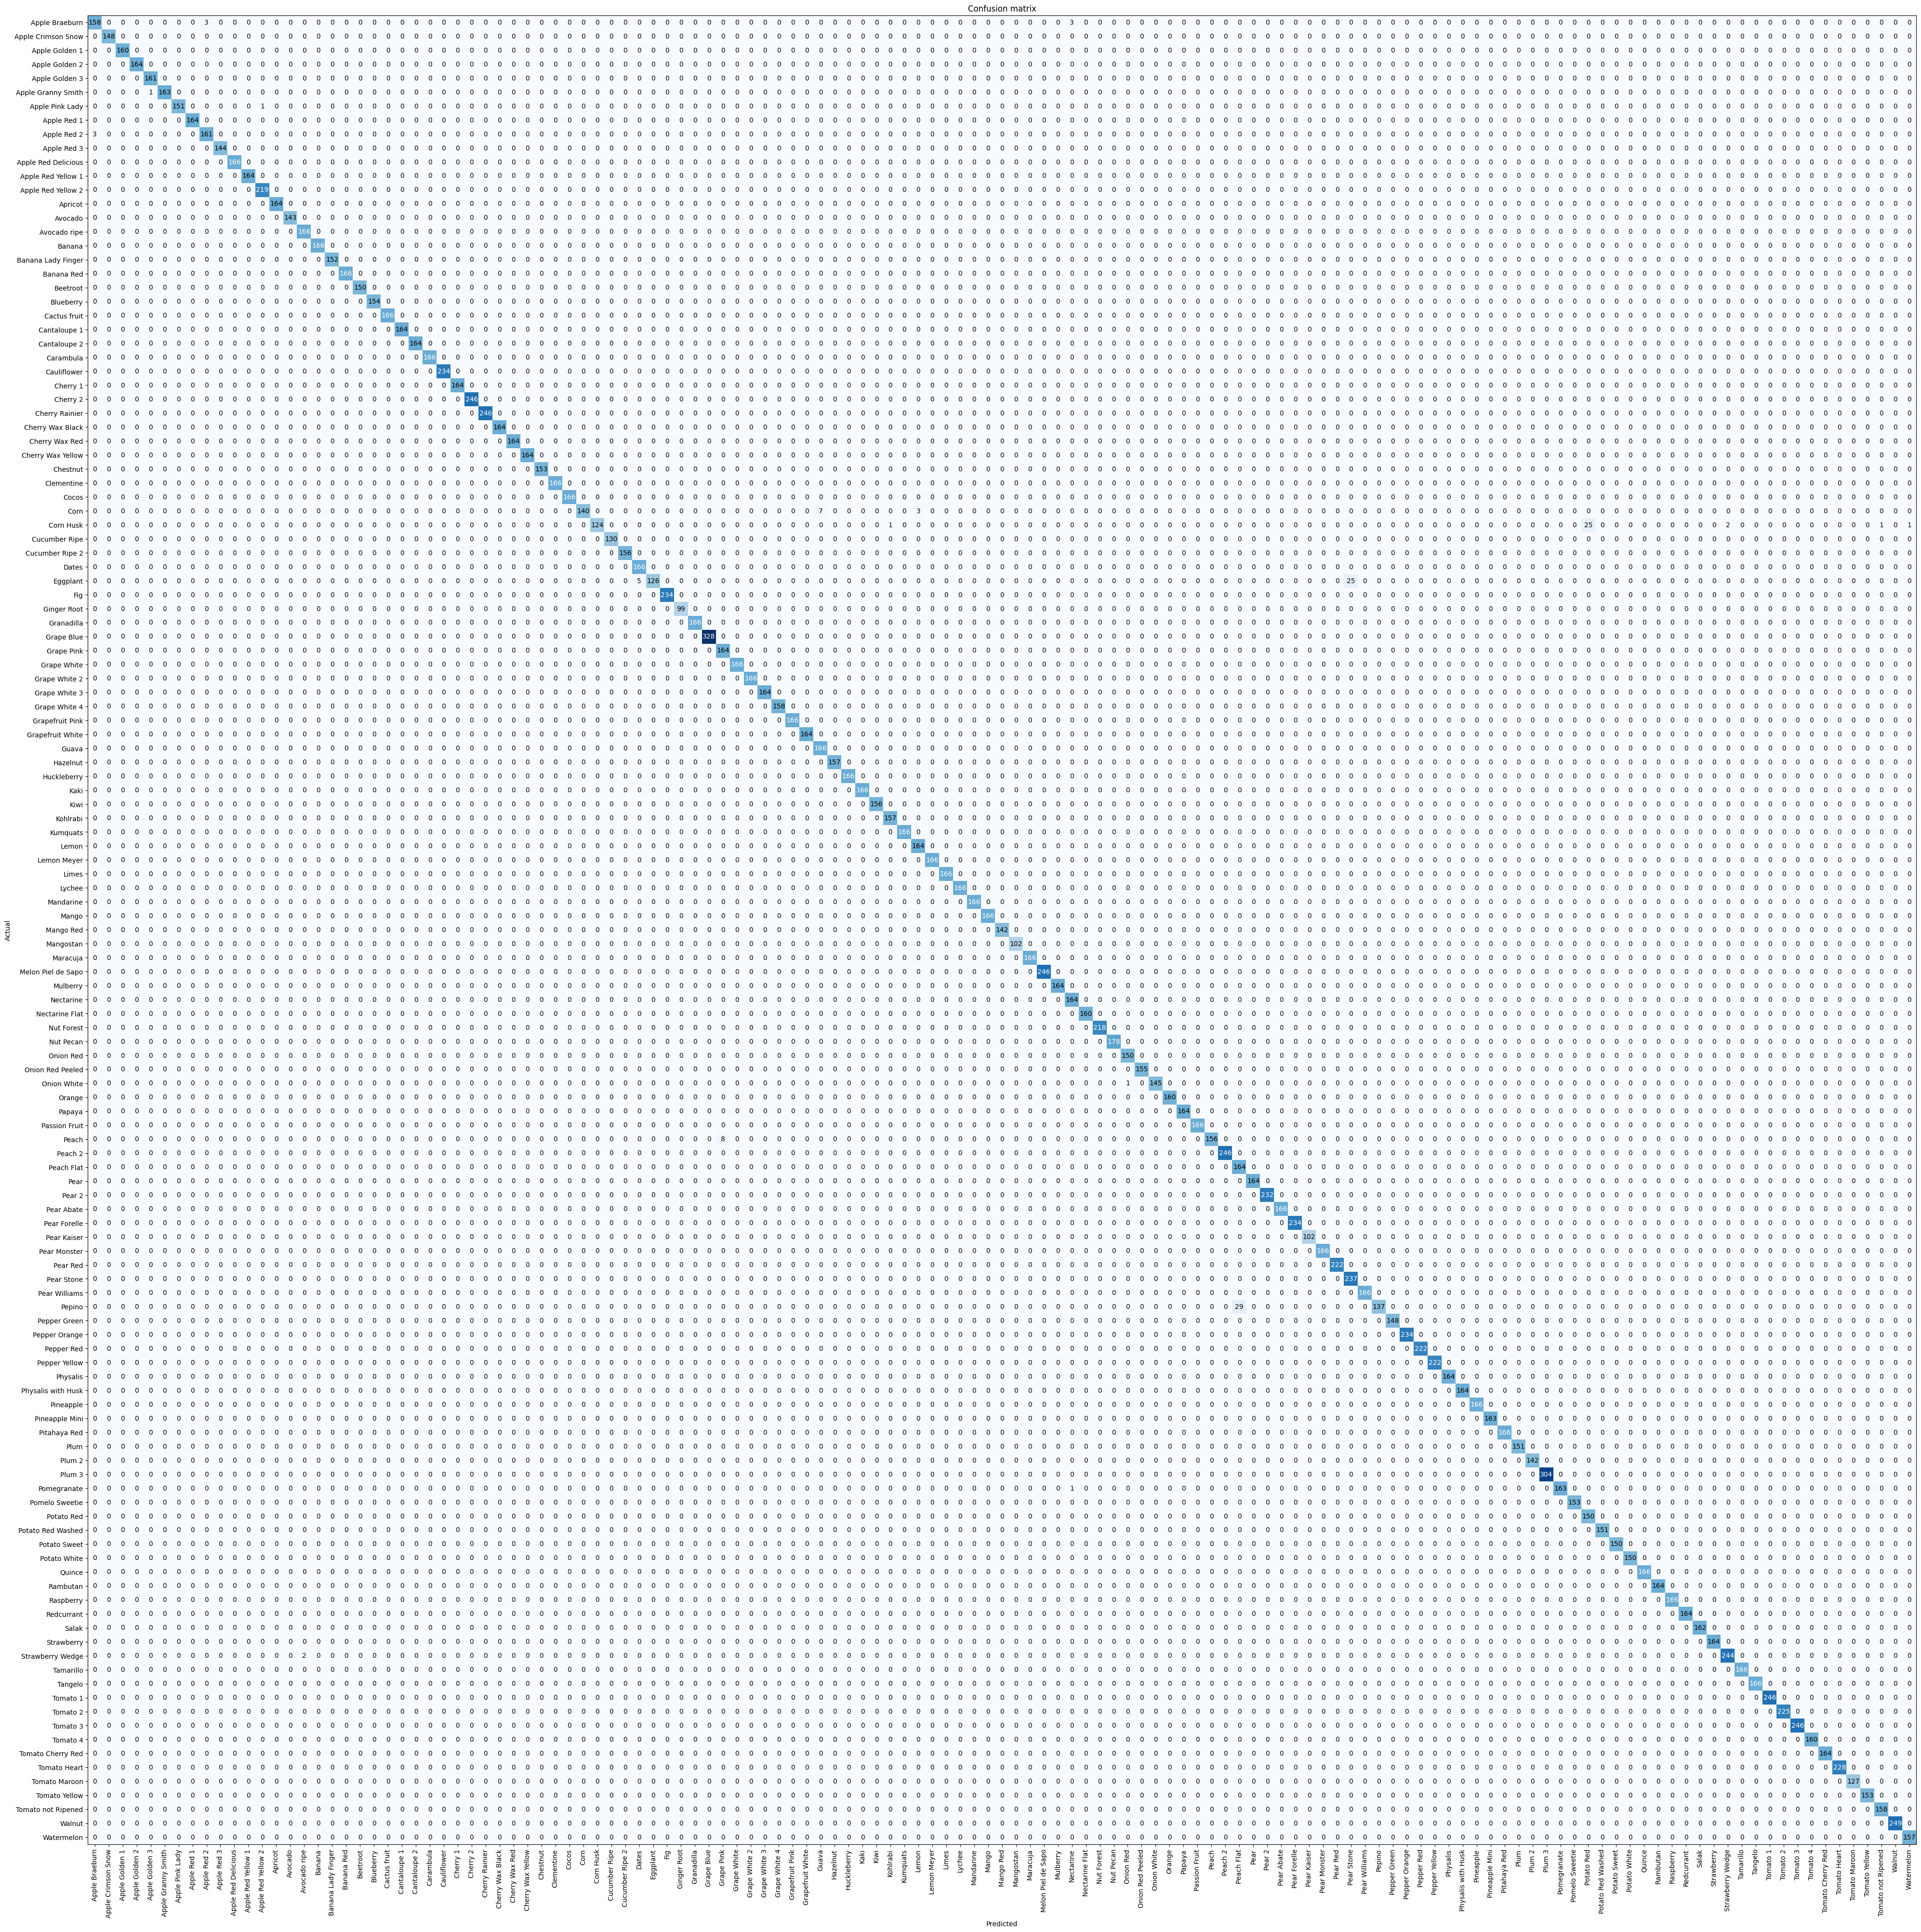

In [14]:
interp.plot_confusion_matrix(figsize=(40,40))

What images did the model struggle the most with? More precisely, what were the most _confident and wrong_ predictions?

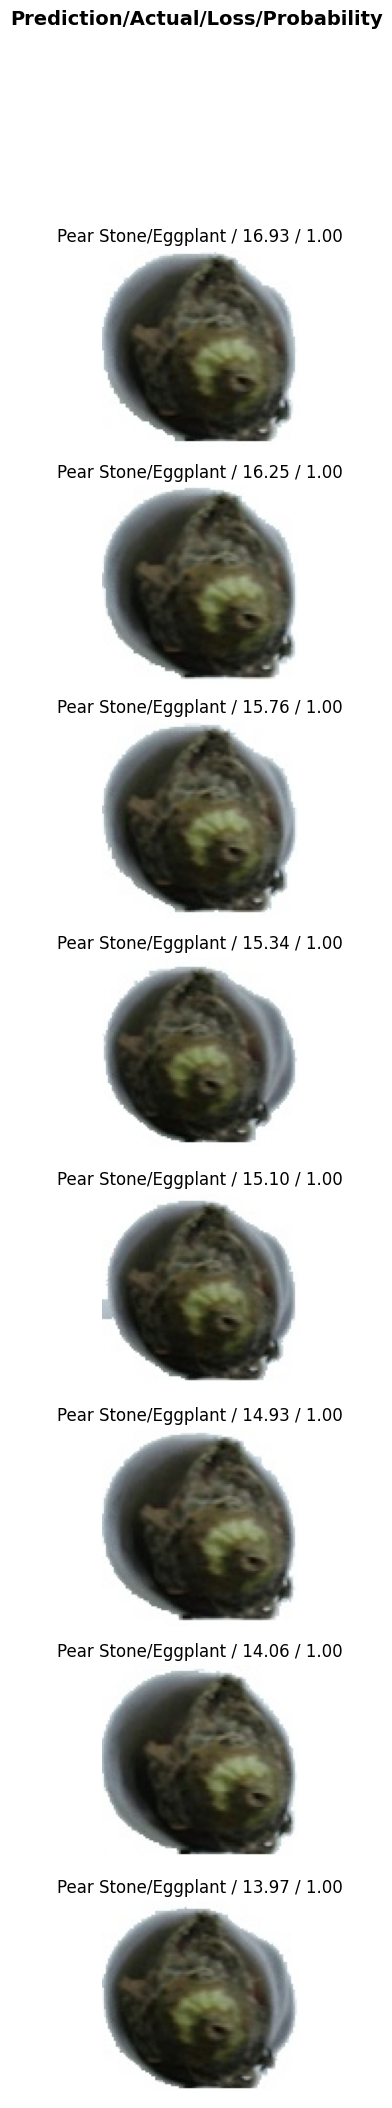

In [15]:
interp.plot_top_losses(k=8, nrows=8)

# Save pipeline (data loader incl. transformations + model)

In [16]:
learn.export(MODELS/'fruit_model_v1')

# Next: deploy the model

See the notebook `3.0-asl-fruit_classifer_app.ipynb`.